In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r"D:\AI\libraries of AI\Supervised_Learning\9_Logistic_Regression_multiclass\breast_cancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [9]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
data['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [11]:
# map function for mapping benign into 0 and malignant into 1
data['diagnosis'] = data['diagnosis'].map({'B':0,'M':1})

In [12]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [14]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [17]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train) 

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
classifier.score(X_train,y_train)

0.958005249343832

In [19]:
classifier.score(X_test,y_test)

0.9574468085106383

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
y_test.value_counts()

0    121
1     67
Name: diagnosis, dtype: int64

In [22]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[117,   4],
       [  4,  63]], dtype=int64)

In [23]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()

In [27]:
 #for clf in (log,dt,rnd,Voting):
 #random forest
 
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
score = clf.score(X_train, y_train)
print(f" Train accuracy for {clf.__class__.__name__} is {score}")
score = clf.score(X_test, y_test)
print(f" Test accuracy for {clf.__class__.__name__} is {score}")
print("============================")

 Train accuracy for RandomForestClassifier is 1.0
 Test accuracy for RandomForestClassifier is 0.9574468085106383


In [25]:
 #for clf in (log,dt,rnd,Voting):
 # logistic Reg
clf = LogisticRegression()
clf.fit(X_train,y_train)
score = clf.score(X_train, y_train)
print(f" Train accuracy for {clf.__class__.__name__} is {score}")
score = clf.score(X_test, y_test)
print(f" Test accuracy for {clf.__class__.__name__} is {score}")
print("============================")

 Train accuracy for LogisticRegression is 0.958005249343832
 Test accuracy for LogisticRegression is 0.9574468085106383


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
clf.feature_importances_

array([0.0319745 , 0.01299944, 0.06409017, 0.0271164 , 0.00499163,
       0.00571319, 0.0792261 , 0.11659283, 0.00306598, 0.0048137 ,
       0.01920434, 0.00318182, 0.02278174, 0.03463198, 0.00529251,
       0.00588224, 0.00651614, 0.0067438 , 0.00265353, 0.00715816,
       0.08470354, 0.01589836, 0.09202416, 0.09014623, 0.01205267,
       0.01554281, 0.05983033, 0.14500801, 0.01298337, 0.00718032])

In [29]:
clf.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [30]:
pd.Series(clf.feature_importances_,index = clf.feature_names_in_).sort_values(ascending = False)

concave points_worst       0.145008
concave points_mean        0.116593
perimeter_worst            0.092024
area_worst                 0.090146
radius_worst               0.084704
concavity_mean             0.079226
perimeter_mean             0.064090
concavity_worst            0.059830
area_se                    0.034632
radius_mean                0.031974
area_mean                  0.027116
perimeter_se               0.022782
radius_se                  0.019204
texture_worst              0.015898
compactness_worst          0.015543
texture_mean               0.012999
symmetry_worst             0.012983
smoothness_worst           0.012053
fractal_dimension_worst    0.007180
fractal_dimension_se       0.007158
concave points_se          0.006744
concavity_se               0.006516
compactness_se             0.005882
compactness_mean           0.005713
smoothness_se              0.005293
smoothness_mean            0.004992
fractal_dimension_mean     0.004814
texture_se                 0

In [31]:
feature_imp = pd.Series(clf.feature_importances_,index = clf.feature_names_in_).sort_values(ascending = False)

In [ ]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.1.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\user\anaconda3\lib\site-packages
Requires: scipy, threadpoolctl, numpy, joblib
Required-by: scikit-learn-intelex, imbalanced-learn


<AxesSubplot:>

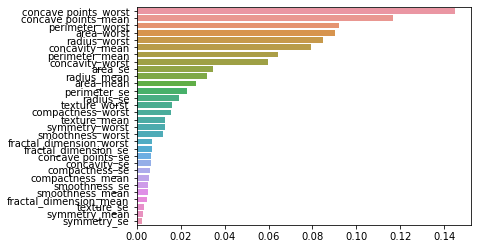

In [32]:
import seaborn as sns
sns.barplot(x = feature_imp,y = feature_imp.index)

In [33]:
#for regression problem AdaBoostregression is used
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

clf.fit(X_train,y_train)
score = clf.score(X_train, y_train)
print(f" Train accuracy for {clf.__class__.__name__} is {score}")
score = clf.score(X_test, y_test)
print(f" Test accuracy for {clf.__class__.__name__} is {score}")
print("============================")

 Train accuracy for AdaBoostClassifier is 1.0
 Test accuracy for AdaBoostClassifier is 0.9521276595744681
